<a href="https://colab.research.google.com/github/zeynep-okkiran/DSA210/blob/main/dsa_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import files
import io
import pandas as pd

In [40]:
df1 = pd.read_csv('happiness.csv')
df2 = pd.read_csv('life_expectancy.csv')

In [41]:
print(df1.to_string())

                      Country                           Region  Happiness Rank  Happiness Score  Standard Error  Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  Generosity  Dystopia Residual
0                 Switzerland                   Western Europe               1            7.587         0.03411                   1.39651  1.34951                   0.94143  0.66557                        0.41978     0.29678            2.51738
1                     Iceland                   Western Europe               2            7.561         0.04884                   1.30232  1.40223                   0.94784  0.62877                        0.14145     0.43630            2.70201
2                     Denmark                   Western Europe               3            7.527         0.03328                   1.32548  1.36058                   0.87464  0.64938                        0.48357     0.34139            2.49204
3                      N

In [42]:
print(df2.to_string())

                      Country  Sum of Females  Life Expectancy  Sum of Life Expectancy  (both sexes)  Sum of Males  Life Expectancy
0                        Chad                            57.19                                 55.24                          53.36
1                     Nigeria                            54.94                                 54.64                          54.33
2                 South Sudan                            60.75                                 57.74                          54.76
3                     Lesotho                            60.44                                 57.80                          55.03
4    Central African Republic                            59.56                                 57.67                          55.51
5                     Somalia                            61.55                                 58.97                          56.49
6                Burkina Faso                            63.43              

In [43]:
countries1 = set(df1['Country'])
countries2 = set(df2['Country'])

common_countries = countries1.intersection(countries2)

print(common_countries)
print(len(common_countries))

{'Mexico', 'Honduras', 'Burkina Faso', 'Malta', 'Sudan', 'South Korea', 'Ghana', 'Cambodia', 'Portugal', 'Qatar', 'Pakistan', 'Austria', 'Hong Kong', 'Cameroon', 'Kenya', 'Azerbaijan', 'Ethiopia', 'Russia', 'Burundi', 'Suriname', 'Bulgaria', 'Thailand', 'Bahrain', 'Nicaragua', 'Central African Republic', 'Hungary', 'Tajikistan', 'Uganda', 'Taiwan', 'Gabon', 'Denmark', 'Ukraine', 'Luxembourg', 'Peru', 'Chile', 'Latvia', 'Norway', 'Kuwait', 'Benin', 'Japan', 'Estonia', 'Tunisia', 'Cyprus', 'Liberia', 'Slovenia', 'Bolivia', 'Guatemala', 'Djibouti', 'Togo', 'Panama', 'Rwanda', 'Oman', 'Georgia', 'Paraguay', 'Jordan', 'India', 'Sweden', 'New Zealand', 'Philippines', 'Syria', 'Finland', 'Mali', 'Turkey', 'Morocco', 'United States', 'Belgium', 'Sierra Leone', 'Egypt', 'Indonesia', 'Libya', 'Kyrgyzstan', 'South Africa', 'Jamaica', 'Zambia', 'Mongolia', 'Mauritania', 'Kazakhstan', 'Netherlands', 'Montenegro', 'Bosnia and Herzegovina', 'Vietnam', 'Moldova', 'Greece', 'Madagascar', 'Romania', 'Uz

In [44]:
print(df1.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


In [46]:
print(df2.columns)

Index(['Country', 'Sum of Females  Life Expectancy',
       'Sum of Life Expectancy  (both sexes)',
       'Sum of Males  Life Expectancy'],
      dtype='object')


In [45]:
columns_to_delete1 = ['Region',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']

df1 = df1.drop(columns=columns_to_delete1)
print(df1.columns)


Index(['Country', 'Happiness Rank', 'Happiness Score'], dtype='object')


In [48]:
# combining two datasets' common country's rows
merged_df = pd.merge(df1, df2, on='Country', how='inner')
print(merged_df.to_string())

                      Country  Happiness Rank  Happiness Score  Sum of Females  Life Expectancy  Sum of Life Expectancy  (both sexes)  Sum of Males  Life Expectancy
0                 Switzerland               1            7.587                            85.95                                 84.09                          82.17
1                     Iceland               2            7.561                            84.47                                 83.01                          81.63
2                     Denmark               3            7.527                            83.98                                 82.09                          80.21
3                      Norway               4            7.522                            84.97                                 83.46                          81.94
4                      Canada               5            7.427                            84.91                                 82.72                          80.53
5         

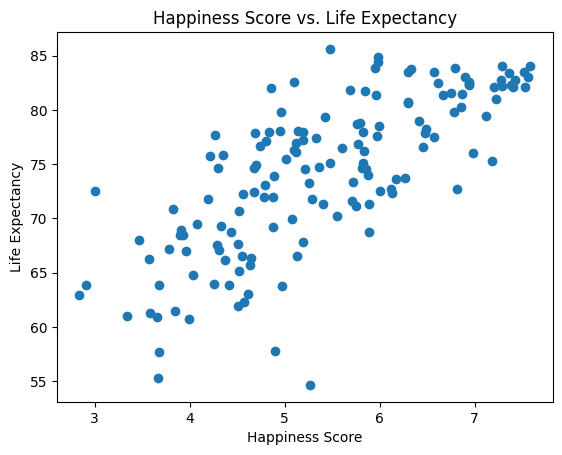

In [50]:

import matplotlib.pyplot as plt

plt.scatter(merged_df['Happiness Score'], merged_df['Sum of Life Expectancy  (both sexes)'])
plt.xlabel('Happiness Score')
plt.ylabel('Life Expectancy')
plt.title('Happiness Score vs. Life Expectancy')
plt.show()

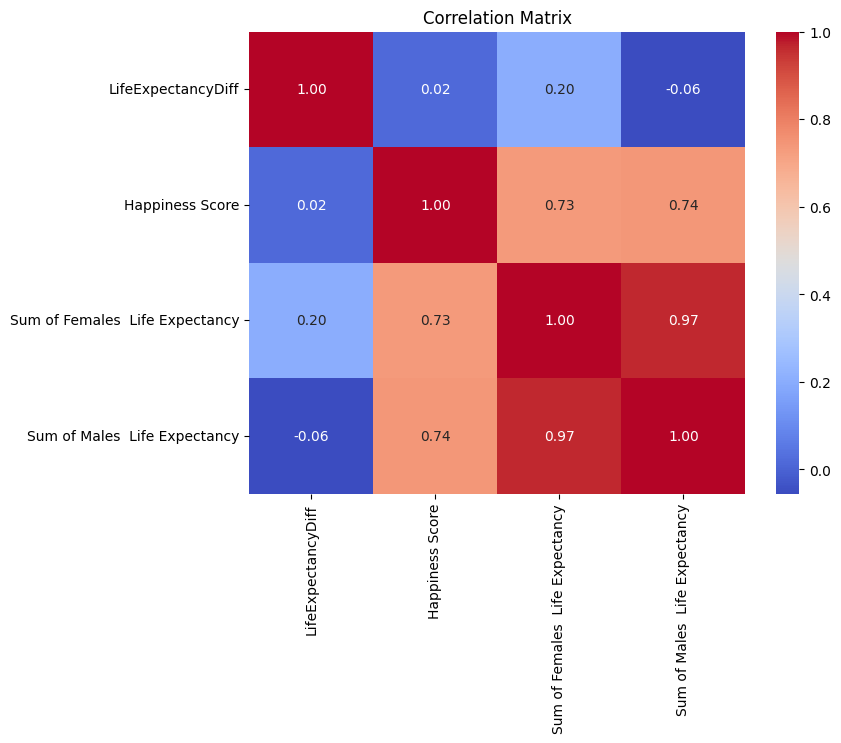

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = merged_df[['LifeExpectancyDiff', 'Happiness Score', 'Sum of Females  Life Expectancy', 'Sum of Males  Life Expectancy']]

correlation_matrix = heatmap_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

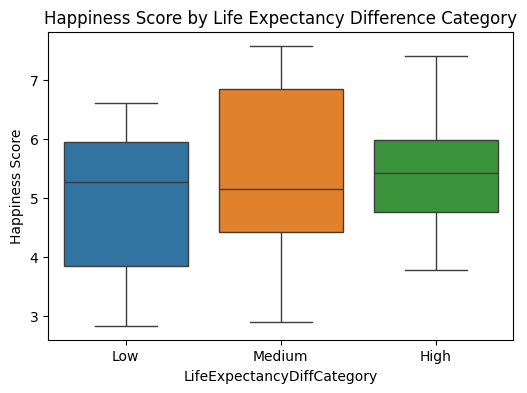

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

merged_df['LifeExpectancyDiffCategory'] = pd.cut(merged_df['LifeExpectancyDiff'], bins=[-float('inf'), 2, 5, float('inf')], labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(6, 4))
sns.boxplot(x='LifeExpectancyDiffCategory', y='Happiness Score', data=merged_df, hue='LifeExpectancyDiffCategory')
plt.title('Happiness Score by Life Expectancy Difference Category')
plt.show()

In [52]:
import pandas as pd
from scipy import stats

merged_df['LifeExpectancyDiff'] = merged_df['Sum of Females  Life Expectancy'] - merged_df['Sum of Males  Life Expectancy']

# Pearson correlation test
correlation, p_value = stats.pearsonr(merged_df['LifeExpectancyDiff'], merged_df['Happiness Score'])

print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.017184150467791842
P-value: 0.835777949682191


p-value > 0.05 hence we fail to reject the null hypthesis. There is no significant correlation between life expantancy of women compared to men and happiness score of the countries.